### Detrending a Simulated Dataset 
For this question, you will be provided a sample time series that exhibits a trend and seasonality. 
Your goal is to remove both of these components to produce a stationary series.


### Download and plot the time series 

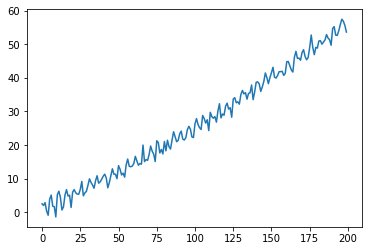

In [ ]:
# No need to change this code
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
frame = pd.read_csv('https://raw.githubusercontent.com/maxoboe/6419_recitations/main/data/simulated.csv')
x = frame['x'].values.reshape(-1,1)
y = frame['y'].values.reshape(-1,1)
plt.plot(x, y)

### Linear Trend
First, fit a line to the data. I recommend using `sklearn.linear_model.LinearRegression`, look [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) for the user guide.


In [ ]:
y_hat = <ADD CODE TO GENERATE LINEAR ESTIMATE>
plt.plot(x, y, label='original data')
plt.plot(x, y_hat, 'r', label='fitted line')
plt.legend()

Now, find and plot the residuals. Is there a clear pattern? 

In [ ]:
linear_residuals = <ADD CODE TO FIND THE RESIDUALS>
plt.plot(x, linear_residuals,'o')

### Remove Linear Trend with First Differences
Remember that your end result will be one period shorter than your original data. 

In [ ]:
first_diff = <ADD CODE TO FIND FIRST DIFFERENCE>
plt.plot(x[:-1],first_diff, 'o')

### Fit and Remove Nonlinear Trend
Based on the residual plots, see if there is any further modification needed to the data to remove any trend. 
Apply this transformation and get the detrended dataset. 


In [ ]:
# Hint: to combine two numpy series, you can use the np.hstack command
# The given command would generate a new x value that includes the additional term, log of x
new_x = np.hstack((x, np.log(x)))
nonlinear_y_hat = <ADD CODE TO GENERATE NONLINEAR Y PREDICTION>
plt.plot(x, y, label='original data')
plt.plot(x, nonlinear_y_hat, 'r', label='fitted line')
plt.legend()
plt.show()
nonlinear_residuals = y - nonlinear_y_hat
plt.plot(x, detrended,'o');

## Removing Seasonal Component 
Find the periodicity of the database - we'll cover some more formal ways to investigate this. For now, we'll just zoom in on the pattern and visually inspect the periodicity.

In [ ]:
start_point = 10
num_points = 20
plt.plot(x[start_point:start_point + num_points],nonlinear_residuals[start_point:start_point + num_points])

### Sinusoidal Approximation
Here, we use an optimization package to find the best sinusoidal approximation to this pattern. 

In [ ]:
from scipy import optimize
period = <ADD YOUR GUESS OF THE PERIOD HERE> 
# --------- nothin below this needs to be changed ------ 
def sine_function(X, amp, phase_shift, mean):
  return (amp * np.sin(1/period * 2 * np.pi * (X - phase_shift)) + mean)
params, _ = sine_curve_fit = optimize.curve_fit(
  f = sine_function,
  xdata = x.flatten(),
  ydata = nonlinear_residuals.flatten(),
  p0 = np.array([3, 1, 10]))
print(params)
amp, phase_shift, mean = params
sin_approx = sine_function(x, amp, phase_shift, mean)
plt.plot(x, nonlinear_residuals, label='detrended data')
plt.plot(x, sin_approx, 'r', label='fitted line')
plt.plot()
plt.show()
sin_residuals = nonlinear_residuals - sin_approx
plt.plot(x, sin_residuals,'o');

### Another approach: time-series fixed effects

In [ ]:
period = <ADD YOUR BEST GUESS OF THE PERIOD HERE> 
# ----- nothing below this line needs to be changed ----- 
x_with_fixed_effects = x
for i in range(period):
  x_with_fixed_effects = np.hstack((x_with_fixed_effects, (x % period)==i))
clf.fit(x_with_fixed_effects, detrended)
fixed_effects_predicted = clf.predict(x_with_fixed_effects)
plt.plot(x, detrended, label='detrended data')
plt.plot(x, fixed_effects_predicted, 'r', label='fitted line')
plt.legend();
plt.plot()
plt.show()
fixed_effects_residuals = detrended - fixed_effects_predicted
plt.plot(x, fixed_effects_residuals, 'o')

### Use Statsmodels to Detrend
For comparison, use Statsmodels package to remove
these same terms. See how this handles these packages. 

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(y, freq=<ADD YOUR BEST GUESS OF THE SEASONAL TERM HERE> )
statsmodels_residuals = res.resid
res.plot()
plt.show()

In [ ]:
# plt.plot(x, detrended, label='detrended data')
for residual, label in zip([linear_residuals, nonlinear_residuals, sin_residuals, fixed_effects_residuals, statsmodels_residuals], 
                         ['linear', 'nonlinear', 'sinusoidal', 'fixed effects', 'statsmodels']):
  print('Mean squared error with {} method is: {}'.format(label, np.nanmean((residual)**2)))